Retrieve daily data from

https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

Resample daily table to weekly table. Compare the result to the weekly table shown on the webpage. Are they the same?


In [27]:
import datetime
import os
import numpy as np
import pandas as pd

#### Data retrieval from yahoo finance

In [28]:
pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import pandas_datareader as pdr
pdr.__version__

'0.10.0'

In [30]:
# retrieve data from yahoo finance
tickers = ['BTC-USD']
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2022, 1, 5)

df = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [31]:
df = df.droplevel('Symbols', axis='columns')
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [32]:
df = df.rename_axis(None, axis=1)
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [33]:
df = df.reset_index()
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


#### Data retrieval from csv file

In [54]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_daily.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
732,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
733,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
734,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
735,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
736,2022-01-06,43429.031250,43745.097656,42645.539063,42992.074219,42992.074219,40913682432


In [46]:
# retrieve weekly data from csv file
df_weekly = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_weekly.csv')
df_weekly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
102,2021-12-15,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-22,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2021-12-29,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
106,2022-01-06,43429.031250,43745.097656,42645.539063,42971.894531,42971.894531,44911583232


#### Resampling


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [56]:
# Column date must have date format
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df.resample('W', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index().tail()
 # 'W' --> 'W-SUN'

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-12,49413.480469,51934.781250,46942.347656,50098.335938,50098.335938,208148497532
102,2021-12-19,50114.742188,50205.000000,45598.441406,46707.015625,46707.015625,214770398202
103,2021-12-26,46707.062500,51814.027344,45579.808594,50809.515625,50809.515625,175052499792
104,2022-01-02,50802.609375,51956.328125,45819.953125,47345.218750,47345.218750,203998848909
105,2022-01-09,47343.542969,47510.726563,42645.539063,42992.074219,42992.074219,153331073558


#### Solution


*   resample day --> week (W-TUE)
*   shift -6 day

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [58]:
# Column date must have date format
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
df = df.resample('W-TUE', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index()
 # 'W' --> 'W-SUN'
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-14,50667.648438,51171.375000,45894.847656,46612.632813,46612.632813,203569721534
102,2021-12-21,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-28,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2022-01-04,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-11,45899.359375,46929.046875,42645.539063,42992.074219,42992.074219,77764767291


In [60]:
df['Date'] = df['Date'] + pd.Timedelta(value=-6, unit='D')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2021-12-08,50667.648438,51171.375000,45894.847656,46612.632813,46612.632813,203569721534
102,2021-12-15,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-22,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2021-12-29,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-05,45899.359375,46929.046875,42645.539063,42992.074219,42992.074219,77764767291


In [61]:
# retrieve weekly data from csv file
df_weekly = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Exercises/BTC_resample/BTC-USD_weekly.csv')
df_weekly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
102,2021-12-15,48379.753906,49473.957031,45579.808594,48936.613281,48936.613281,205982757404
103,2021-12-22,48937.097656,51956.328125,47414.210938,47588.855469,47588.855469,174789516376
104,2021-12-29,47623.871094,48472.527344,45752.464844,45897.574219,45897.574219,221810432535
105,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
106,2022-01-06,43429.031250,43745.097656,42645.539063,42971.894531,42971.894531,44911583232


#### Plotting

In [42]:
import matplotlib.pyplot as plt

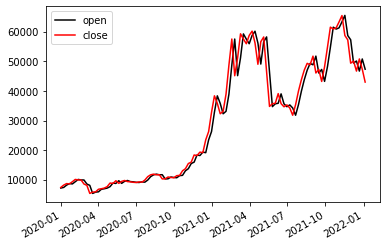

In [43]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(df['Date']), df['Open'], marker='', linestyle='-', color = 'black', label = 'open')
plt.plot(pd.to_datetime(df['Date']), df['Close'], marker='', linestyle='-', color = 'red', label = 'close')

fig.autofmt_xdate() # per distanziare automaticamente le date

plt.legend()
plt.show()